In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [2]:
super_data = pd.read_csv('train.csv')
# https://archive.ics.uci.edu/dataset/464/superconductivty+data

In [3]:
super_data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
super_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
corr_matrix = super_data.corr()

In [6]:
corr_matrix['critical_temp'].sort_values(ascending=True)

wtd_mean_Valence              -0.632401
wtd_gmean_Valence             -0.615653
mean_Valence                  -0.600085
gmean_Valence                 -0.573068
gmean_Density                 -0.541684
                                 ...   
std_ThermalConductivity        0.653632
range_atomic_radius            0.653759
range_ThermalConductivity      0.687654
wtd_std_ThermalConductivity    0.721271
critical_temp                  1.000000
Name: critical_temp, Length: 82, dtype: float64

In [31]:
target = super_data['critical_temp']

Text(0, 0.5, 'Critical Temperature')

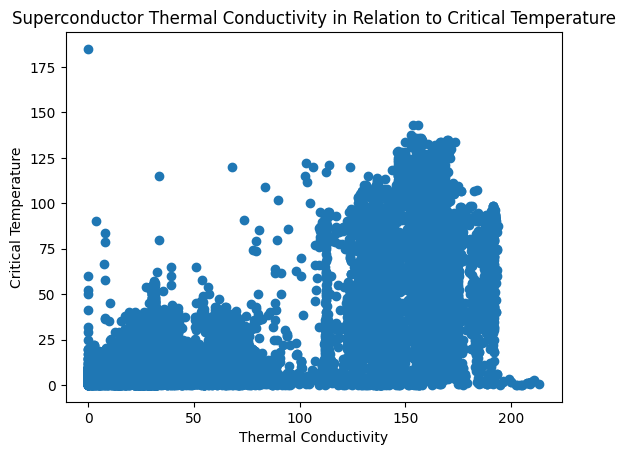

In [33]:
plt.scatter(super_data['wtd_std_ThermalConductivity'], target)
plt.title('Superconductor Thermal Conductivity in Relation to Critical Temperature')
plt.xlabel('Thermal Conductivity')
plt.ylabel('Critical Temperature')

In [9]:
features = super_data.drop(['critical_temp'], axis = 1)

In [10]:
train, test, target, target_test = train_test_split(features, target, test_size=0.2)

In [11]:
model_1 = Lasso(alpha=1e1)
model_1.fit(train, target)

/home/esera/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+05, tolerance: 2.005e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10.0)

In [12]:
predictions1 = model_1.predict(test)

In [13]:
mean_squared_error(target_test, predictions1)

391.9706121667641

In [14]:
model_2 = Ridge(alpha=1e1)
model_2.fit(train, target)

Ridge(alpha=10.0)

In [15]:
predictions2 = model_2.predict(test)
mean_squared_error(target_test, predictions2)

310.684899605402

In [16]:
model_3 = LinearRegression()
model_3.fit(train, target)

LinearRegression()

In [17]:
predictions3 = model_3.predict(test)
mean_squared_error(target_test, predictions3)

307.56558211444576

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
params_lasso = [
    {'alpha': np.logspace(1, 8, num = 6, base=2)}
]
k = KFold(n_splits=3)
reg = Lasso()
grid = GridSearchCV(reg, params_lasso, scoring='neg_mean_squared_error', cv=k)
grid.fit(train, target)

/home/esera/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.651e+05, tolerance: 1.334e+03
  model = cd_fast.enet_coordinate_descent(
/home/esera/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.275e+05, tolerance: 1.343e+03
  model = cd_fast.enet_coordinate_descent(
/home/esera/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.00

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Lasso(),
             param_grid=[{'alpha': array([  2.        ,   5.27803164,  13.92880901,  36.75834736,
        97.00586026, 256.        ])}],
             scoring='neg_mean_squared_error')

In [19]:
results = pd.DataFrame(grid.cv_results_)

In [20]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.260632,1.711022,0.012987,0.003125,2.0,{'alpha': 2.0},-335.661310,-351.608595,-353.033925,-346.767943,7.875103,1
1,2.918022,0.188967,0.012473,0.003527,5.278032,{'alpha': 5.278031643091577},-356.063187,-372.680315,-373.684315,-367.475939,8.080437,2
2,3.173259,0.461329,0.011607,0.007185,13.928809,{'alpha': 13.928809012737984},-385.495703,-400.604592,-399.183092,-395.094462,6.812112,3
3,1.679125,0.495780,0.012266,0.003743,36.758347,{'alpha': 36.7583473599051},-434.900201,-443.744518,-445.901946,-441.515555,4.759958,4
4,0.491390,0.198954,0.008941,0.005550,97.00586,{'alpha': 97.00586025666546},-482.589809,-489.492623,-495.308479,-489.130303,5.198692,5
5,0.473857,0.122583,0.012695,0.005422,256.0,{'alpha': 256.0},-561.535069,-563.376524,-571.816007,-565.575867,4.476029,6


In [21]:
mean_squared_error(target_test, grid.predict(test))

350.78040144291595

In [22]:
model_4 = ElasticNet(alpha=1e1)
model_4.fit(train, target)

/home/esera/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.276e+03, tolerance: 2.005e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10.0)

In [23]:
predictions4 = model_4.predict(test)
mean_squared_error(target_test, predictions4)

375.45352584022424

In [24]:
knet = KFold(n_splits=5)
elastic = ElasticNetCV(cv=knet)
elastic.fit(train, target)

ElasticNetCV(cv=KFold(n_splits=5, random_state=None, shuffle=False))

In [25]:
min = elastic.alphas_.min()
min

148.37028029058817

In [26]:
mean_squared_error(target_test, elastic.predict(test))

484.4616293507935

In [27]:
mean_squared_error(target, elastic.predict(train))

479.1884462552687

In [28]:
md = ElasticNet(alpha=min)
md.fit(train, target)

ElasticNet(alpha=148.37028029058817)

In [29]:
mean_squared_error(target_test, md.predict(test))

484.4616293507935